In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [262]:
giris = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
cikis = np.array([0, 1, 1, 0]) #xor


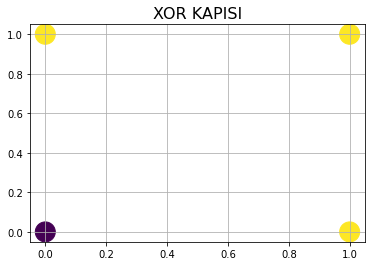

In [233]:
plt.title('XOR KAPISI', fontsize=16)
plt.scatter(giris[:,0], giris[:,1], s=400, c = cikis) # sarılar 1 morlar 0 
plt.grid() 
plt.show()

In [283]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        #self.w = np.zeros(1 + X.shape[1])
        self.w = np.random.rand((1 + X.shape[1])) * 2
        self.w
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0)

In [288]:
siniflandirici = Perceptron(ogrenme_orani= 0.05, iter_sayisi=10)

In [289]:
siniflandirici.ogren(giris, cikis)

In [290]:
siniflandirici.hatalar

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [287]:
siniflandirici.w

array([ 0.23360345, -0.1085624 , -0.24375459])

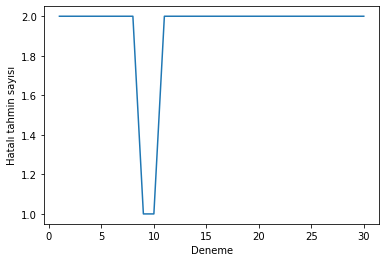

In [291]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()